## Locality Preserving Projection on Iris Dataset

In [13]:
"""-------------------------------------
Author: Rajkumar Conjeevaram Mohan
AI graduate from Imperial College London
Email: rajkumarcm@yahoo.com
Program: Locality Preserving Projection
---------------------------------------"""

'-------------------------------------\nAuthor: Rajkumar Conjeevaram Mohan\nAI graduate from Imperial College London\nEmail: rajkumarcm@yahoo.com\nProgram: Locality Preserving Projection\n---------------------------------------'

In [14]:
import numpy as np
import matplotlib
%matplotlib widget
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from sklearn.datasets import make_swiss_roll, make_s_curve
from mpl_toolkits import mplot3d
from ipywidgets import interact, IntSlider, FloatSlider
import ipywidgets as widgets
np.random.seed(123)

In [15]:
# Import data

def get_data(N, noise=0):
    
#     X, t = make_swiss_roll(n_samples=N, noise=noise, random_state=42)
    X, t = make_s_curve(n_samples=N, noise=noise, random_state=123)
    return X, t

In [4]:
def get_distance(x_test, X):
    if len(x_test.shape) == 1:
        x_test = np.expand_dims(x_test, [0])
    return np.sqrt(np.sum((x_test - X)**2, axis=1))

In [5]:
def get_S_D(K, v, X, c, d, kernel):
    
    N = X.shape[0]
    # Construct the distance matrix
    D = np.zeros([N, N])
    for i in range(N):
        D[i] = get_distance(X[i], X)

    # Construct the connectivity matrix
    S1 = np.zeros([N, N])
    for i in range(N):
        distance = np.copy(D[i])
        for k in range(K):
            distance[i] = np.inf
            index = np.nanargmin(distance)
            S1[i, index] = 1
            distance[index] = np.inf

    indices = np.where(S1 > 0)  
    S = np.zeros([N, N])
    for i, j in zip(indices[0], indices[1]):
        if kernel == 'rbf':
            S[i, j] = np.exp(-(X[i] @ X[j])/v)
            S[j, i] = S[i, j]
        elif kernel == 'poly':
            S[i, j] = (X[i] @ X[j] + c)**d
            S[j, i] = S[i, j]
            
    # Make distance matrix diagonal
    D = np.diag(np.sum(D, axis=1))
    
    return S, D

### RBF Kernel

In [6]:
import pdb
old_N = None
X = None
t = None
@interact(N=IntSlider(min=500, max=5000, step=500, value=2500, continuous_update=False),
          noise=FloatSlider(min=0, max=1, step=0.1, value=0, continuous_update=False),
          K=IntSlider(min=5, max=100, step=5, value=20, continuous_update=False),
          v=FloatSlider(min=0.1, max=1, step=0.1, value=0.2, continuous_update=False))
def project(N, noise, K, v):
    if old_N != N:
        X, t = get_data(N, noise=noise)
    S, D = get_S_D(K, v, X, c=0, d=0, kernel='rbf')
#     S, D = get_S_D(K, v, X, c=0, d=0, kernel='poly')
    V, U = np.linalg.eig(np.linalg.inv(D) @ (D-S))
    U = np.real(U)
    V = np.real(V)
    U = X.T @ U
    indices = np.argsort(V)
    V = V[indices]
    U = U[:, indices]
    indices = V > 0
    V = V[indices]
    U = U[:, indices]
    Z = X @ U[:, :2]
    fig = plt.figure(figsize=(6, 5))
#     axes1 = fig.add_subplot(2, 1, 1, projection='3d')
#     axes1.scatter(X[:, 0], X[:, 1], X[:, 2], '.', c=t)
#     axes1.set_title('Swiss Roll')
    
    axes2 = fig.add_subplot(1, 1, 1)
    axes2.set_title('LPP')
    axes2.scatter(Z[:, 0], Z[:, 1], c=t)
    plt.show()

interactive(children=(IntSlider(value=2500, continuous_update=False, description='N', max=5000, min=500, step=…

In [7]:
# project(2000, 0, 20, 0.2)

In [ ]:
# Interesting projection 
# project(2000, 0, 20, 0.6)
# project(2500, 0, 30, 0.2)

### Polynomial Kernel

In [17]:
@interact(N=IntSlider(min=500, max=5000, step=500, value=2500, continuous_update=False),
          noise=FloatSlider(min=0, max=1, step=0.1, value=0, continuous_update=False),
          K=IntSlider(min=5, max=100, step=5, value=20, continuous_update=False),
          c=FloatSlider(min=0.1, max=10, step=0.1, value=0.2, continuous_update=False),
          d=FloatSlider(min=1, max=10, step=1, value=1, continuous_update=False))
def project_poly(N, noise, K, c, d):
    if old_N != N:
        X, t = get_data(N, noise=noise)
    S, D = get_S_D(K, v=0, X=X, c=c, d=d, kernel='poly')
    V, U = np.linalg.eig(np.linalg.inv(D) @ (D-S))
    U = np.real(U)
    V = np.real(V)
    U = X.T @ U
    indices = np.argsort(V)
    V = V[indices]
    U = U[:, indices]
    indices = V > 0
    V = V[indices]
    U = U[:, indices]
    Z = X @ U[:, :2]
    fig = plt.figure(figsize=(6, 5))
    
    axes2 = fig.add_subplot(1, 1, 1)
    axes2.set_title('LPP')
    axes2.scatter(Z[:, 0], Z[:, 1], c=t)
    plt.show()

interactive(children=(IntSlider(value=2500, continuous_update=False, description='N', max=5000, min=500, step=…

#### For appearance in GitHub

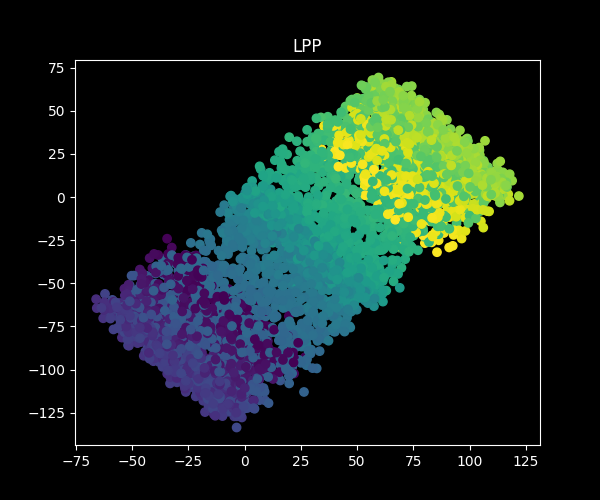

In [19]:
project_poly(4500, 0.1, 30, 0.2, 1)